C:\Users\ka843\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index (DBI): 0.9862851051792104
Silhouette Score: 0.3964612604248057


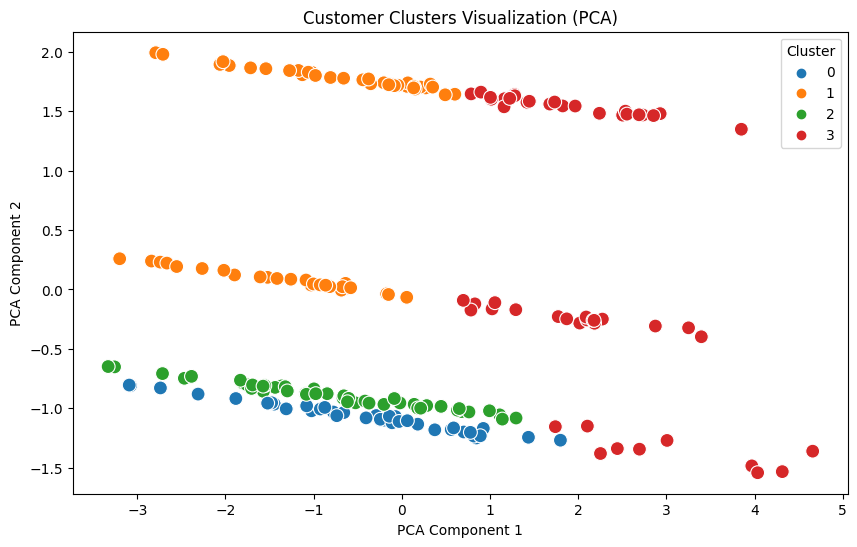

C:\Users\ka843\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index (DBI): 0.9862851051792104
Silhouette Score: 0.3964612604248057


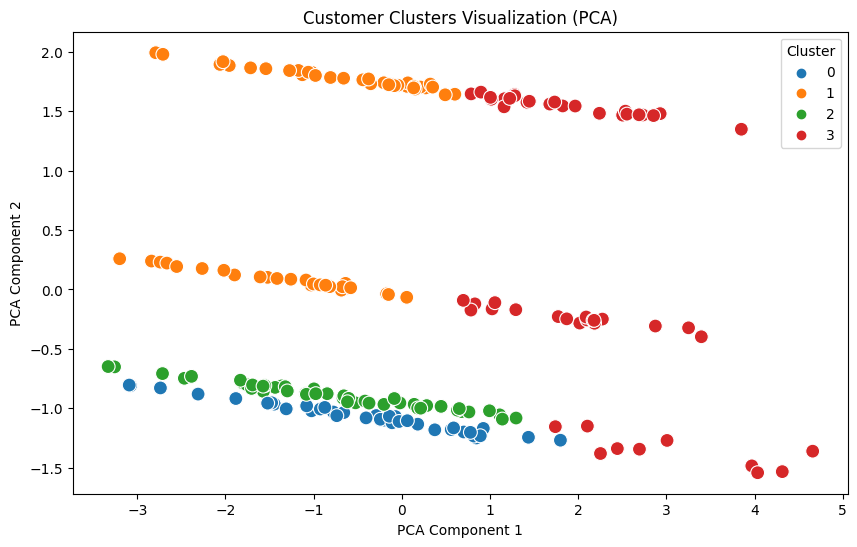

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

customers = pd.read_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Customers.csv')
transactions = pd.read_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Transactions.csv')

merged_data = transactions.merge(customers, on='CustomerID')

customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'Quantity': 'sum',  
    'TransactionID': 'count'  
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')

customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])  

num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])

print(f"Davies-Bouldin Index (DBI): {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

customer_features.to_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Customer_Segmentation2.csv', index=False)
